# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/6_cornernet_lite/installation
     
 - Select the right requirements file and run
 
     - chmod +x install.sh
     - ./install.sh

# About the network

1. Paper on CornerNet: https://arxiv.org/abs/1808.01244

2. Paper on CornerNet-Lite: https://arxiv.org/abs/1904.08900

3. Blog 1 on CornerNet: https://joshua19881228.github.io/2019-01-20-CornerNet/

4. Blog 2 on CornerNet: https://zhangtemplar.github.io/anchor-free-detection/

5. Blog 3 on CornerNet: https://opencv.org/latest-trends-of-object-detection-from-cornernet-to-centernet-explained-part-i-cornernet/

6. Blog 4 on CornerNet: https://towardsdatascience.com/centernet-keypoint-triplets-for-object-detection-review-a314a8e4d4b0

7. Blog 5 on CornerNet: https://medium.com/@andersasac/the-end-of-anchors-improving-object-detection-models-and-annotations-73828c7b39f6

# COCO Format - 1

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------ship (coco_dir) 
          |         |
          |         |----images (img_dir)
          |                |
          |                |------Train (set_dir) (Train)
          |                         |
          |                         |---------img1.jpg
          |                         |---------img2.jpg
          |                         |---------..........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_Train.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "ship";
 - img_dir = "images";
 - set_dir = "Train";

 
 Note: Annotation file name too coincides against the set_dir

# COCO Format - 2

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------ship (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 
 For TrainSet
 - root_dir = "../sample_dataset";
 - coco_dir = "ship";
 - img_dir = "./";
 - set_dir = "ImagesTrain";

 
 Note: Annotation file name too coincides against the set_dir
 

# Sample Dataset Credits

    credits: https://github.com/experiencor/kangaroo

In [1]:
import os
import sys

In [2]:
sys.path.append("../../6_cornernet_lite/lib/")

In [3]:
from train_detector import Detector

In [4]:
gtf = Detector();

In [5]:
root_dir = "../sample_dataset";
coco_dir = "kangaroo"
img_dir = "/"
set_dir = "Images"

In [6]:
gtf.Train_Dataset(root_dir, coco_dir, img_dir, set_dir, batch_size=4, use_gpu=True, num_workers=4)

In [7]:
gtf.Model(model_name="CornerNet_Saccade")

In [8]:
gtf.Hyper_Params(lr=0.00025, total_iterations=1000)

In [9]:
gtf.Setup();

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [10]:
gtf.Train();

start_iter       = 0
distributed      = False
world_size       = 0
initialize       = False
batch_size       = 4
learning_rate    = 0.00025
max_iteration    = 1000
stepsize         = 800
snapshot         = 500
val_iter         = 500
display          = 100
decay_rate       = 10
Process 0: building model...
total parameters: 116847521
start prefetching data...
start prefetching data...
start prefetching data...
shuffling indices...
shuffling indices...
shuffling indices...
start prefetching data...
shuffling indices...
setting learning rate to: 0.00025
training start...
Process 0: training loss at iteration 100: 5.4285078048706055                   
 16%|██████▏                                 | 155/1000 [02:15<12:24,  1.13it/s]shuffling indices...
Process 0: training loss at iteration 200: 8.167193412780762                    
Process 0: training loss at iteration 300: 5.306697368621826                    
 32%|████████████▊                           | 319/1000 [04:40<10:01,  1.13it/s]s

# Inference

In [1]:
import os
import sys
sys.path.append("../../6_cornernet_lite/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
class_list = ["kangaroo"]
gtf.Model(class_list, 
          base="CornerNet_Saccade", 
          model_path="./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_final.pkl")

total parameters: 116847521
loading from ./cache/nnet/CornerNet_Saccade/CornerNet_Saccade_final.pkl


/home/abhi/.virtualenvs/monk_obj_6_cornernet_lite/lib/python3.7/site-packages/torch/nn/functional.py:2423: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


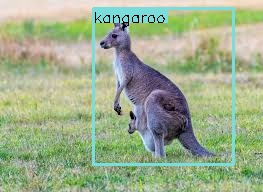

In [5]:
boxes = gtf.Predict("../sample_dataset/kangaroo/test/kg1.jpeg", vis_thresh=0.3, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

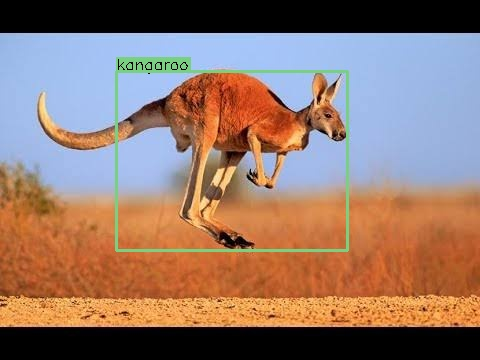

In [6]:
boxes = gtf.Predict("../sample_dataset/kangaroo/test/kg4.jpeg", vis_thresh=0.15, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')

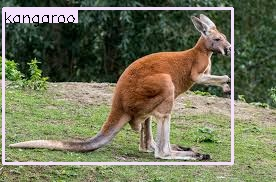

In [7]:
boxes = gtf.Predict("../sample_dataset/kangaroo/test/kg3.jpeg", vis_thresh=0.3, output_img="output.jpg")
from IPython.display import Image
Image(filename='output.jpg')